# Machine Learning
Yan Wu
yanwu26@gmail.com

* This machine learning tutorial finds the best parameters for kNN. 
* Data: pima indians diabetes

### Process:
* kNN with 5 neighbors, using a cross validation to find optimal accuracy
* kNN with 5 neighbors, using cross validation for 20 periods
* kNN with 5 neighbors, using cross validation for 20 periods using RandomizedCV


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.preprocessing import binarize
from IPython.core.display import HTML 
from IPython.core.display import Image, display
%matplotlib inline

In [2]:
#get data, split into X Matrix, y vector
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
X = pima[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']]
y= pima.label
print(X.head(3))
print(y.head(3))

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
0    1
1    0
2    1
Name: label, dtype: int64


# kNN with 5 using 15 Fold Cross Validation

Mean Accuracy: 0.72149321267


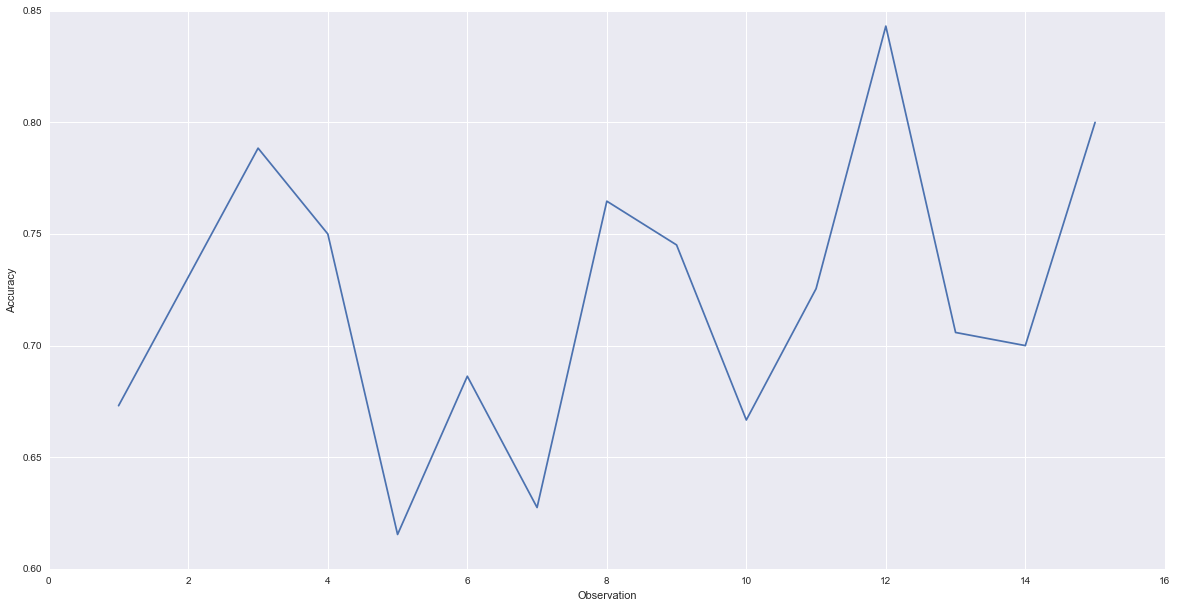

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
n_cv=15
scores = cross_val_score(knn, X, y, cv=n_cv, scoring='accuracy')
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(20,10))
plt.plot(list(range(1,n_cv+1)),scores)
plt.xlabel('Observation')
plt.ylabel('Accuracy')
print('Mean Accuracy:', scores.mean())

# kNN with N=5 over 20 periods

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.67987833081950733, 0.71233785822021112, 0.70313423831070887, 0.72136349924585219, 0.72149321266968325, 0.73054198089492206, 0.73453896430367016, 0.74220713926596282, 0.74243539467068875, 0.74348818501759673, 0.73830970336852697, 0.75520563097033688, 0.74615585721468092, 0.75138461538461554, 0.74361588738059337, 0.75794570135746597, 0.75409854198089499, 0.76320160884866783, 0.74902161890397201]
# of records#: 285


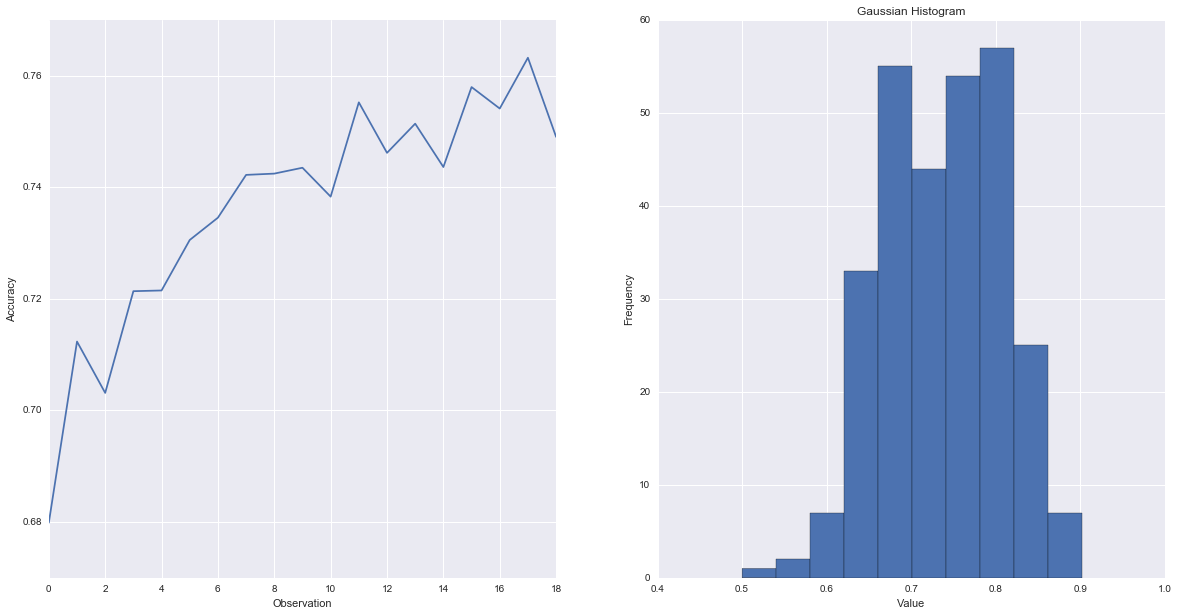

In [16]:
k_range = list(range(1,20))
n_cv=15
print(k_range)
k_scores = []
k_scores_ls = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) #use KNN with k neighbors
    scores = cross_val_score(knn, X, y, cv=n_cv, scoring='accuracy')
    k_scores.append(scores.mean())
    k_scores_ls.extend(scores)
print(k_scores)
print('# of records#:',len(k_scores_ls))
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(k_scores)
plt.xlabel('Observation')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.hist(k_scores_ls)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.figure(figsize=(20,10))
plt.show()

# KNN Search for optimal number of neighbors n

In [18]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [19]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy')
grid.fit(X,y)
grid.grid_scores_

[mean: 0.67969, std: 0.08153, params: {'n_neighbors': 1},
 mean: 0.71224, std: 0.06426, params: {'n_neighbors': 2},
 mean: 0.70312, std: 0.05895, params: {'n_neighbors': 3},
 mean: 0.72135, std: 0.05134, params: {'n_neighbors': 4},
 mean: 0.72135, std: 0.06120, params: {'n_neighbors': 5},
 mean: 0.73047, std: 0.05777, params: {'n_neighbors': 6},
 mean: 0.73438, std: 0.06520, params: {'n_neighbors': 7},
 mean: 0.74219, std: 0.06093, params: {'n_neighbors': 8},
 mean: 0.74219, std: 0.07181, params: {'n_neighbors': 9},
 mean: 0.74349, std: 0.06321, params: {'n_neighbors': 10},
 mean: 0.73828, std: 0.05793, params: {'n_neighbors': 11},
 mean: 0.75521, std: 0.06080, params: {'n_neighbors': 12},
 mean: 0.74609, std: 0.06950, params: {'n_neighbors': 13},
 mean: 0.75130, std: 0.06286, params: {'n_neighbors': 14},
 mean: 0.74349, std: 0.06959, params: {'n_neighbors': 15},
 mean: 0.75781, std: 0.06974, params: {'n_neighbors': 16},
 mean: 0.75391, std: 0.07685, params: {'n_neighbors': 17},
 mean:

0.763020833333
{'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


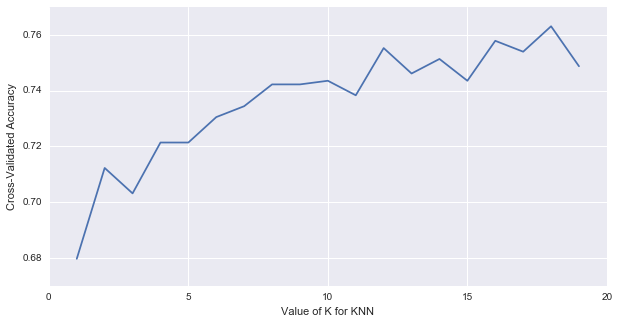

In [20]:
# plot the results
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.figure(figsize=(10,5))
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

# KNN Search for optimal number of neighbors n and weight option

In [21]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [22]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
grid.grid_scores_[:10]

[mean: 0.68359, std: 0.05620, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.68359, std: 0.05620, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.71354, std: 0.04073, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.68359, std: 0.05620, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.70312, std: 0.03763, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.70052, std: 0.03885, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.71875, std: 0.04378, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.70703, std: 0.03163, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.72135, std: 0.04417, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.72266, std: 0.04336, params: {'n_neighbors': 5, 'weights': 'distance'}]

0.756510416667
{'weights': 'uniform', 'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


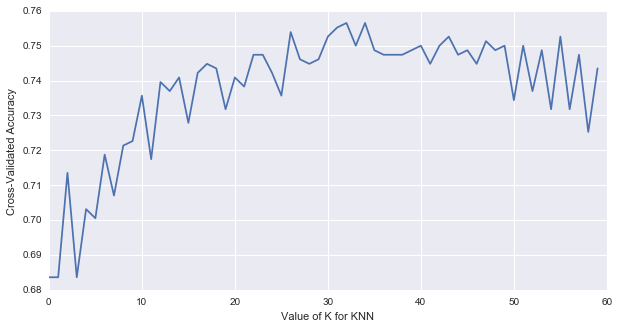

In [261]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.figure(figsize=(10,5))
plt.plot(grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

### Retrain Model using X Y split

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=4)
n = grid.best_params_['n_neighbors']
wgt = grid.best_params_['weights']
knn=KNeighborsClassifier(n_neighbors=n, weights=wgt)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.763557483731


# RandomizedSearchCV

In [267]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=15, scoring='accuracy', n_iter=20)#, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.75781, std: 0.06974, params: {'weights': 'uniform', 'n_neighbors': 16},
 mean: 0.74349, std: 0.06959, params: {'weights': 'uniform', 'n_neighbors': 15},
 mean: 0.74479, std: 0.05289, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.75260, std: 0.06119, params: {'weights': 'distance', 'n_neighbors': 29},
 mean: 0.73438, std: 0.06520, params: {'weights': 'uniform', 'n_neighbors': 7},
 mean: 0.67969, std: 0.08153, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.74219, std: 0.06093, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.73047, std: 0.05777, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.70312, std: 0.05895, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.75130, std: 0.07715, params: {'weights': 'distance', 'n_neighbors': 17},
 mean: 0.75260, std: 0.06774, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.73568, std: 0.06112, params: {'weights': 'distance', 'n_neighbors': 11},
 mean: 0.74479, std: 0.07996,

In [268]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rnd = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rnd.fit(X, y)
    best_scores.append(round(rnd.best_score_, 3))
print(best_scores)

[0.75, 0.755, 0.753, 0.75700000000000001, 0.75700000000000001, 0.75700000000000001, 0.755, 0.755, 0.754, 0.75, 0.75700000000000001, 0.75700000000000001, 0.753, 0.75, 0.747, 0.754, 0.754, 0.75700000000000001, 0.755, 0.753]


0.756510416667
{'weights': 'uniform', 'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


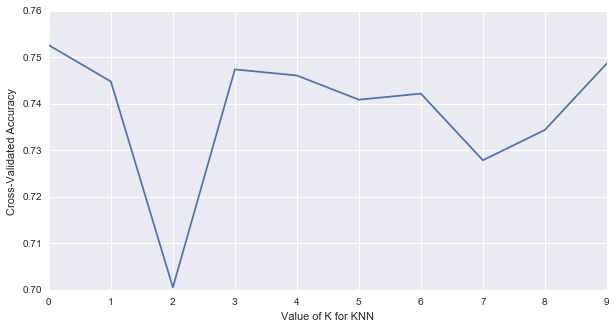

In [255]:
rnd_mean_scores=[result.mean_validation_score for result in rnd.grid_scores_]
plt.figure(figsize=(10,5))
plt.plot(rnd_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)